# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [76]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,num_clusters):
    color = 'brgcmykwd'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        k = 'k'+ str(num_clusters)
        for i in range(num_clusters):
#            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
#            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            df = X[X[k]==i]
            plt.scatter(df['x'],df['y'],c = color[i], alpha = alpha,s=s)
            plt.title(k)


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



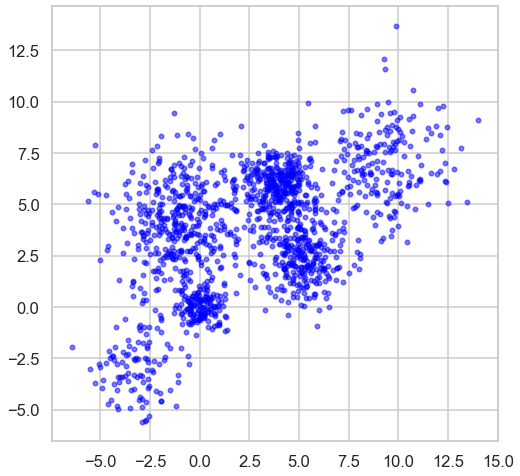

In [120]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data,0)

## change format of the data set to be a data frame

In [122]:
Multi_blob_Data_df1=pd.DataFrame(Multi_blob_Data, columns=list('xy'))
Multi_blob_Data_df1

,x,y
0,-2.354272,-3.179744
1,-2.158005,-1.020061
2,-3.304399,-3.304378
3,-0.947023,-2.002335
4,-3.610317,-2.294672
...,...,...
1445,9.240137,3.378037
1446,10.305952,7.366174
1447,9.864057,13.674604
1448,5.457008,9.931984


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [123]:
# k = 4 , 5 ,6 ,7 ,8
Multi_blob_Data_df=Multi_blob_Data_df1.copy()
k4 = KMeans(4).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k4']=k4
k5=KMeans(5).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k5']=k5
k6=KMeans(6).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k6']=k6
k7=KMeans(7).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k7']=k7
k8=KMeans(8).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k8']=k8
Multi_blob_Data_df

,x,y,k4,k5,k6,k7,k8
0,-2.354272,-3.179744,1,1,3,6,0
1,-2.158005,-1.020061,1,1,3,6,0
2,-3.304399,-3.304378,1,1,3,6,0
3,-0.947023,-2.002335,1,1,3,6,0
4,-3.610317,-2.294672,1,1,3,6,0
...,...,...,...,...,...,...,...
1445,9.240137,3.378037,3,3,4,3,6
1446,10.305952,7.366174,3,3,4,3,3
1447,9.864057,13.674604,3,3,4,3,3
1448,5.457008,9.931984,3,0,0,1,1


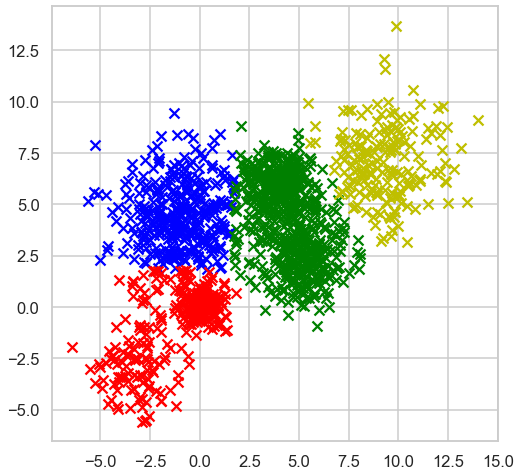

In [124]:
#testing k4
df1 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==0]
df2 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==1]
df3 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==2]
df4 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==3]
plt.scatter(df1['x'],df1['y'],c = 'b', marker = 'x', s = 100)
plt.scatter(df2['x'],df2['y'],c = 'r', marker = 'x', s = 100)
plt.scatter(df3['x'],df3['y'],c = 'g', marker = 'x', s = 100)
plt.scatter(df4['x'],df4['y'],c = 'y', marker = 'x', s = 100)


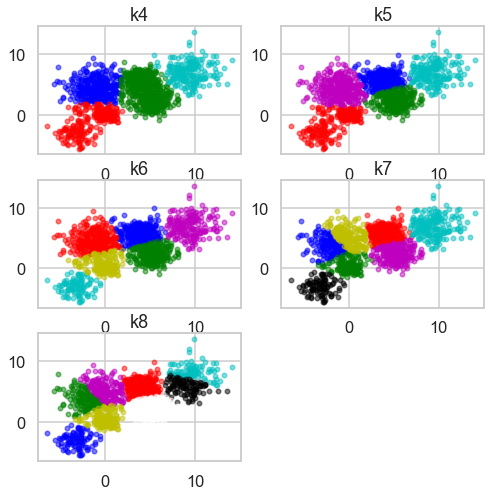

In [125]:
#applying display_cluster for each k value

plt.figure()
plt.subplot(321)
display_cluster(Multi_blob_Data_df,4);
plt.subplot(322)
display_cluster(Multi_blob_Data_df,5);
plt.subplot(323)
display_cluster(Multi_blob_Data_df,6);
plt.subplot(324)
display_cluster(Multi_blob_Data_df,7);
plt.subplot(325)
display_cluster(Multi_blob_Data_df,8);


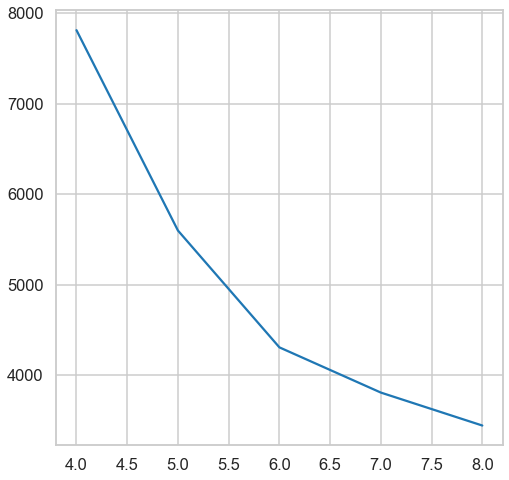

In [149]:
#plot distortion function versus K --> K value at the elbow is better to choose 
k = [4,5,6,7,8]
y=[]
for i in k :
    y.append(KMeans(i).fit(Multi_blob_Data_df1).inertia_)
plt.plot(k,y)
#best k is 6

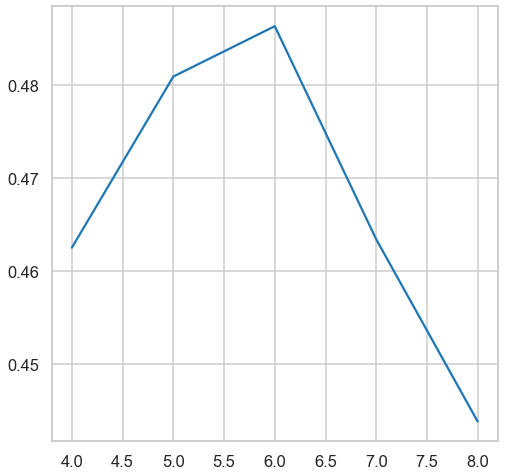

In [162]:
#silhouette_score
z=[]
z.append(silhouette_score(Multi_blob_Data_df1, k4))

z.append(silhouette_score(Multi_blob_Data_df1, k5))

z.append(silhouette_score(Multi_blob_Data_df1, k6))

z.append(silhouette_score(Multi_blob_Data_df1, k7))

z.append(silhouette_score(Multi_blob_Data_df1, k8))


plt.plot(k,z)
#best k is 6

In [163]:
Kmeans_max_silhouette_score=max(z)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 